A model `hyperparameter` is a characteristic of a model that is external to the model and whose value cannot be estimated from data. The value of the `hyperparameter` has to be set before the learning process begins. For example, `c` in `SVM`, `k` in `KNN`, the number of hidden layers in Neural Networks.

In contrast, a parameter is an internal characteristic of the model and its value can be estimated from data. Example, `beta coefficients of linear/logistic regression` or `support vector`s in `SVM`.

>Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

### Import Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV
np.set_printoptions(precision=2)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-csv/breastCancer.csv


### Import the dataset

In [2]:
#import data
data = pd.read_csv('/kaggle/input/breast-cancer-csv/breastCancer.csv')

In [3]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Each row in the dataset have one of two possible classes: benign (represented by 2) and malignant (represented by 4). Also, there are 10 attributes in this dataset (shown above) which will be used for prediction.

### Data Cleaning
Clean the data and rename the class values as 0/1 for model building (where 1 represents a malignant case). Also, let’s observe the distribution of the class.

In [7]:
data = data.drop(['id'],axis=1) #Drop 1st column
data = data[data['bare_nucleoli'] != '?'] #Remove rows with missing data
data['class'] = np.where(data['class'] ==2,0,1) #Change the Class representation
data['class'].value_counts() #Class distribution

0    444
1    239
Name: class, dtype: int64

There are 444 benign and 239 malignant cases.

In [8]:
#Split data into attributes and class
X = data.drop(['class'],axis=1)
y = data['class']

In [9]:
#perform training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Dummy Classifier
`DummyClassifier` is a classifier that makes predictions using simple rules.This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.

In [10]:
#Dummy Classifier
# clf=DummyClassifier(strategy="most_frequent")
# clf.fit(X_train,y_train)
clf = DummyClassifier(strategy= 'most_frequent',random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [11]:

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))
#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    103
1     68
Name: class, dtype: int64
y predicted : 
0    171
dtype: int64


### Calculate the evaluation metrics of model

In [12]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred,labels=np.unique(y_pred))))

Accuracy Score : 0.6023391812865497
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[103   0]
 [ 68   0]]


### Function for confusion matrix plot

In [14]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[103   0]
 [ 68   0]]


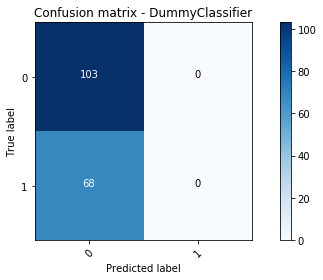

In [16]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - DummyClassifier')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

## Logistic Regression model with default parameters

In [17]:
#Logistic regression
clf = LogisticRegression(solver="lbfgs",random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [18]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.9532163742690059
Precision Score : 0.9838709677419355
Recall Score : 0.8970588235294118
F1 Score : 0.9384615384615386


In [19]:
#Logistic Regression Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[102   1]
 [  7  61]]


In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[102   1]
 [  7  61]]


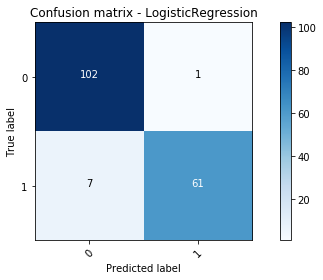

In [21]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - LogisticRegression')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

## Logistic Regression + Grid Search



In [22]:
#Grid Search
clf = LogisticRegression(solver='liblinear',random_state=42)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall',cv=5,iid=True)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

In [23]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.9122807017543859
Precision Score : 0.8732394366197183
Recall Score : 0.9117647058823529
F1 Score : 0.8920863309352517


In [24]:
#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

array([[94,  9],
       [ 6, 62]])

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[102   1]
 [  7  61]]


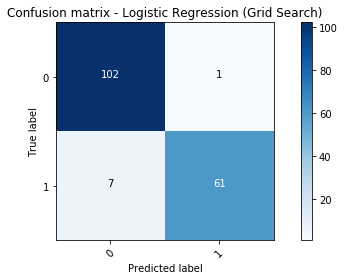

In [26]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression (Grid Search)')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

The hyperparameters we tuned are:
- Penalty: l1 or l2 which species the norm used in the penalization.
- C: Inverse of regularization strength- smaller values of C specify stronger regularization.

## HistGradientBoostingClassifier
`HistGradientBoostingClassifier` is Histogram-based Gradient Boosting ClassificationTree.

In [27]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [28]:
clf = HistGradientBoostingClassifier(learning_rate=0.005,random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [29]:
clf.score(X_test,y_test)

0.8947368421052632

In [30]:
#Logistic Regression Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[102   1]
 [ 17  51]]


In [31]:
cnf_matrix_hgbc = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[102   1]
 [ 17  51]]


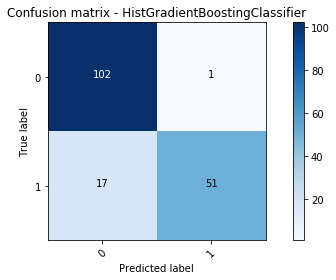

In [32]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix_hgbc, classes=class_names,
                      title='Confusion matrix - HistGradientBoostingClassifier')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()